<a href="https://colab.research.google.com/github/divyavashist9758-eng/Student-performance-predictor/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Student Performance Predictor


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/score_updated.csv")

In [ ]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
max_score=df['Scores'].max()
max_score

99

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


#No Missing Values
step 2:Create The Performance Framing

In [ ]:
# Step 2: Define performance level based on score
def get_performance(score):
    if score < 40:
        return 'Low'
    elif score < 70:
        return 'Medium'
    else:
        return 'High'

# Apply the function to the 'Scores' column
df['Performance'] = df['Scores'].apply(get_performance)

# View the updated DataFrame
print(df.head(10))

   Hours  Scores Performance
0    2.5      21         Low
1    5.1      47      Medium
2    3.2      27         Low
3    8.5      75        High
4    3.5      30         Low
5    1.5      20         Low
6    9.2      88        High
7    5.5      60      Medium
8    8.3      81        High
9    2.7      25         Low


In [ ]:
# Step 3: Encode categorical labels (Low/Medium/High to 0/1/2)
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Performance' column
df['PerformanceLabel'] = le.fit_transform(df['Performance'])

# Show mapping: e.g., {'High': 0, 'Low': 1, 'Medium': 2}
print("Label Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Show updated DataFrame
print(df.head(10))

Label Mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
   Hours  Scores Performance  PerformanceLabel
0    2.5      21         Low                 1
1    5.1      47      Medium                 2
2    3.2      27         Low                 1
3    8.5      75        High                 0
4    3.5      30         Low                 1
5    1.5      20         Low                 1
6    9.2      88        High                 0
7    5.5      60      Medium                 2
8    8.3      81        High                 0
9    2.7      25         Low                 1


In [ ]:
# Step 8: Define features and label
X = df[['Hours', 'Scores']]  # Features
y = df['PerformanceLabel']   # Target

In [ ]:
# Step 9: Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 76
Testing samples: 20


In [ ]:
# Step 10: Import and train the model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Step 11: Make predictions
y_pred = model.predict(X_test)

# Step 12: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.86      0.92         7
         Low       1.00      1.00      1.00         8
      Medium       0.83      1.00      0.91         5

    accuracy                           0.95        20
   macro avg       0.94      0.95      0.94        20
weighted avg       0.96      0.95      0.95        20



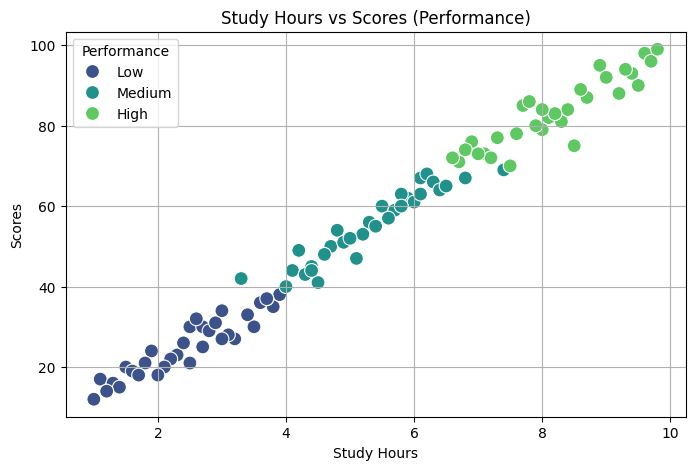

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Hours', y='Scores', hue='Performance', palette='viridis', s=100)
plt.title('Study Hours vs Scores (Performance)')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

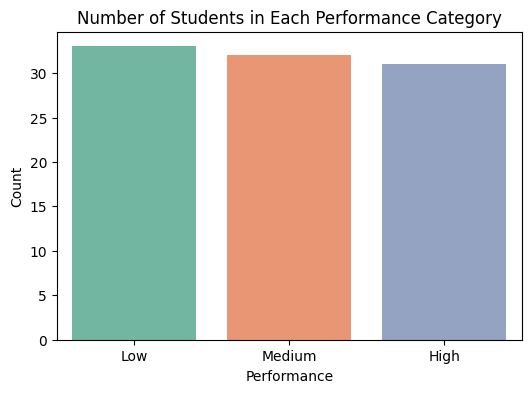

In [ ]:
# Count plot for performance categories
plt.figure(figsize=(6,4))
sns.countplot(x='Performance', data=df, palette='Set2')
plt.title('Number of Students in Each Performance Category')
plt.xlabel('Performance')
plt.ylabel('Count')
plt.show()

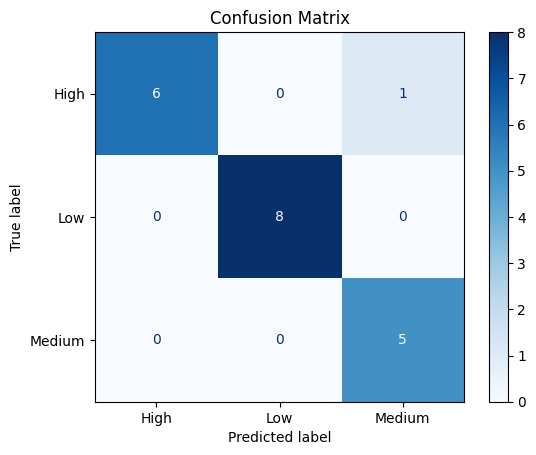

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 13: Predict new input
new_data = [[6, 30]]  # [Hours, Scores]
predicted_label = model.predict(new_data)
predicted_class = le.inverse_transform(predicted_label)

print("Predicted Performance:", predicted_class[0])

Predicted Performance: Low
